# Quantitative Portfolio Optimization in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from scipy.stats import norm

import pyfolio as pf

import createEFPortfolio as efp

Using TensorFlow backend.
C:\Users\leand\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
dfPrice = pd.read_excel(r'.\data\price.xlsx', parse_dates=['DATE'])
dfPrice.set_index(['DATE'], inplace=True)

dfTickers = pd.read_excel(r'.\data\tickers.xlsx')
dfTickers = dfTickers[dfTickers.enable == 1]
tickers = dfTickers.ticker.tolist()
lb = dfTickers.lb.values.reshape(-1, 1)
ub = dfTickers.ub.values.reshape(-1, 1)

resample_rule = 'W-FRI'
modelName = 'neural.h5'

df = dfPrice[tickers]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3959 entries, 2004-04-30 to 2020-01-31
Data columns (total 26 columns):
BBAS3       3959 non-null float64
BBDC3       3959 non-null float64
BRAP4       3959 non-null float64
BRFS3       3959 non-null float64
CSNA3       3959 non-null float64
CYRE3       3959 non-null float64
ELET3       3959 non-null float64
EMBR3       3959 non-null float64
GGBR4       3959 non-null float64
GOAU4       3959 non-null float64
IBOV        3959 non-null int64
IMA-B 5     3959 non-null float64
IMA-B 5+    3959 non-null float64
IMA-S       3959 non-null float64
IRF-M 1     3959 non-null float64
IRF-M 1+    3959 non-null float64
ITSA4       3959 non-null float64
LAME4       3959 non-null float64
PETR3       3959 non-null float64
PETR4       3959 non-null float64
PTAX        3959 non-null float64
RADL3       3959 non-null float64
USIM5       3959 non-null float64
VALE3       3959 non-null float64
VIVT4       3959 non-null float64
WEGE3       3959 non-null f

### i. Efficient Frontier Portfolio with PyPortfolioOpt
pip install PyPortfolioOpt

In [3]:
efp.create_xl_EFPortfolio(df, lb, ub, resample_rule)

#0 error:{'start': Timestamp('2004-04-30 00:00:00'), 'end': Timestamp('2004-05-07 00:00:00')}'>' not supported between instances of 'NoneType' and 'float'
#16 error:{'start': Timestamp('2004-08-20 00:00:00'), 'end': Timestamp('2004-08-27 00:00:00')}'>' not supported between instances of 'NoneType' and 'float'
#48 error:{'start': Timestamp('2005-04-01 00:00:00'), 'end': Timestamp('2005-04-08 00:00:00')}'>' not supported between instances of 'NoneType' and 'float'
#326 error:{'start': Timestamp('2010-07-30 00:00:00'), 'end': Timestamp('2010-08-06 00:00:00')}'>' not supported between instances of 'NoneType' and 'float'
[====================] 100%

### ii. Training Model with Keras

In [4]:
dfWeightsEF = pd.read_excel(r"weightsEF.xlsx")
dfWeightsEF.set_index(['epochs'], inplace=True)
dfReturnsEF = pd.read_excel(r"returnsEF.xlsx")
dfReturnsEF.set_index(['epochs'], inplace=True)

print(dfWeightsEF.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 1 to 821
Data columns (total 26 columns):
BBAS3       818 non-null float64
BBDC3       818 non-null float64
BRAP4       818 non-null float64
BRFS3       818 non-null float64
CSNA3       818 non-null float64
CYRE3       818 non-null float64
ELET3       818 non-null float64
EMBR3       818 non-null float64
GGBR4       818 non-null float64
GOAU4       818 non-null float64
IBOV        818 non-null float64
IMA-B 5     818 non-null float64
IMA-B 5+    818 non-null float64
IMA-S       818 non-null float64
IRF-M 1     818 non-null float64
IRF-M 1+    818 non-null float64
ITSA4       818 non-null float64
LAME4       818 non-null float64
PETR3       818 non-null float64
PETR4       818 non-null float64
PTAX        818 non-null float64
RADL3       818 non-null float64
USIM5       818 non-null float64
VALE3       818 non-null float64
VIVT4       818 non-null float64
WEGE3       818 non-null float64
dtypes: float64(26)
memory usage: 172

In [5]:
efp.create_model(dfReturnsEF, dfWeightsEF, modelName)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 572 samples, validate on 246 samples
Epoch 1/1000
572/572 [==============================] - 1s 952us/step - loss: 0.0058 - acc: 0.1416 - val_loss: 0.0034 - val_acc: 0.2276
Epoch 2/1000
572/572 [==============================] - 0s 144us/step - loss: 0.0030 - acc: 0.1469 - val_loss: 0.0031 - val_acc: 0.1098
Epoch 3/1000
572/572 [==============================] - 0s 201us/step - loss: 0.0025 - acc: 0.1643 - val_loss: 0.0025 - val_acc: 0.2480
Epoch 4/1000
572/572 [==============================] - 0s 148us/step - loss: 0.0021 - acc: 0.2238 - val_loss: 0.0022 - val_acc: 0.2236
Epoch 5/1000
572/572 [==============================] - 0s 164us/step - loss: 0.0018 - acc: 0.2343 - val_loss: 0.0020 - val_acc: 0.2520
Epoch 6/1000
572/572 [==============================] - 0s 226us/step - loss: 0.0016 - acc: 0.2552 - val_loss: 0.0018 - val_acc: 0.1911
Epoch 7/1000
572/572 [================

### iii. Predicting

In [6]:
dfWeightsEF = pd.read_excel(r"weightsEF.xlsx")
dfWeightsEF.set_index(['epochs'], inplace=True)
dfReturnsEF = pd.read_excel(r"returnsEF.xlsx")
dfReturnsEF.set_index(['epochs'], inplace=True)

print(dfWeightsEF.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 1 to 821
Data columns (total 26 columns):
BBAS3       818 non-null float64
BBDC3       818 non-null float64
BRAP4       818 non-null float64
BRFS3       818 non-null float64
CSNA3       818 non-null float64
CYRE3       818 non-null float64
ELET3       818 non-null float64
EMBR3       818 non-null float64
GGBR4       818 non-null float64
GOAU4       818 non-null float64
IBOV        818 non-null float64
IMA-B 5     818 non-null float64
IMA-B 5+    818 non-null float64
IMA-S       818 non-null float64
IRF-M 1     818 non-null float64
IRF-M 1+    818 non-null float64
ITSA4       818 non-null float64
LAME4       818 non-null float64
PETR3       818 non-null float64
PETR4       818 non-null float64
PTAX        818 non-null float64
RADL3       818 non-null float64
USIM5       818 non-null float64
VALE3       818 non-null float64
VIVT4       818 non-null float64
WEGE3       818 non-null float64
dtypes: float64(26)
memory usage: 172

In [7]:
dfReturns = dfPrice[tickers + ['R_FREE']]
dfReturns = dfReturns.pct_change().dropna()

dfRetW = dfReturns[tickers].resample(resample_rule).mean()

model = load_model(modelName)
model_predict = model.predict(dfRetW)

In [8]:
dfWeights = pd.DataFrame(data=model_predict,  columns=tickers, index = dfRetW.index.tolist())
dfWeights['RFREE'] = 1 - dfWeights.sum(axis=1)

dfWeights = dfWeights.resample('D').ffill()
dfWeights.index.names = ['DATE']

dfWeights = dfWeights.loc[dfWeights.index.isin(dfReturns.index.tolist())]
dfReturns = dfReturns.loc[dfReturns.index.isin(dfWeights.index.tolist())]

retFund = (dfWeights.values * dfReturns.values).sum(axis=1)

dfFUND = pd.DataFrame(data=(1 + retFund).cumprod(),  index=dfWeights.index.to_list())
dfFUND.columns = ["NAV"]
dfFUND.index.names = ['DATE']

dfFUND['RET'] = dfFUND.NAV.pct_change()
dfFUND['VOL126'] = dfFUND.RET.rolling(126).std() * 252 ** 0.5
dfFUND['VOL252'] = dfFUND.RET.rolling(252).std() * 252 ** 0.5

dfFUND = pd.concat([dfWeights, dfFUND], axis=1)

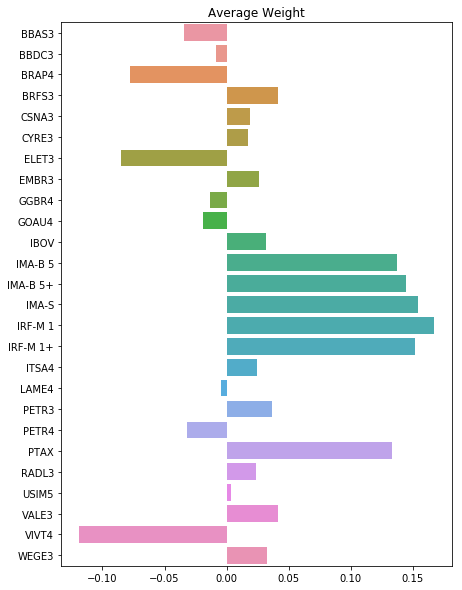

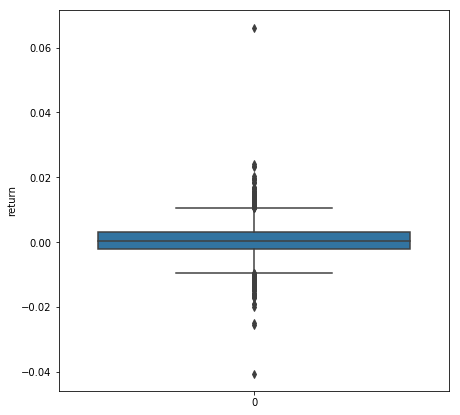

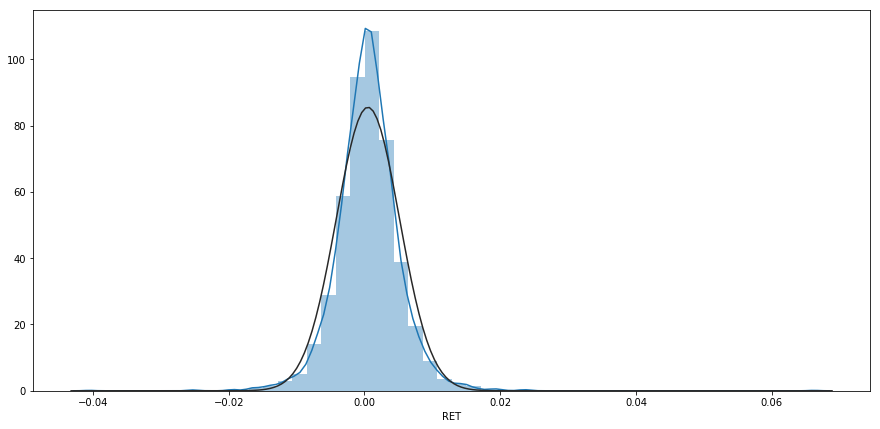

In [9]:
plt.figure(figsize = (7,10))
#ax = sns.barplot(x="val", y="index", hue="variable", data=dfPortMaxSharpe)
ax = sns.barplot(dfFUND[tickers].mean().values, dfFUND[tickers].mean().index)
_ = plt.title('Average Weight')


plt.figure(figsize = (7,7))
ax = sns.boxplot(data=dfFUND.RET.dropna())
_ = ax.set(ylabel='return')

plt.figure(figsize = (15,7))
ax = sns.distplot(dfFUND.RET.dropna(), fit=norm)

In [10]:
dfFUND.to_excel(r"model_PredictFUND.xlsx")

### iv. Backtesting with Pyfolio
pip install pyfolio


In [11]:
dfNAV = pd.read_excel('model_PredictFUND.xlsx', parse_dates=['DATE'])
dfNAV.set_index(['DATE'], inplace=True)
dfNAV = dfNAV[['NAV']]

dfP = pd.concat([dfNAV, dfPrice[tickers + ['R_FREE']] ], axis=1).dropna()
dfRetALL = dfP.pct_change().dropna()#[-4 * 252::]
dfVolALL = dfRetALL.rolling(252).std().dropna() * 252 ** 0.5
dfALL = (1 + dfRetALL).cumprod().dropna()

C:\Users\leand\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


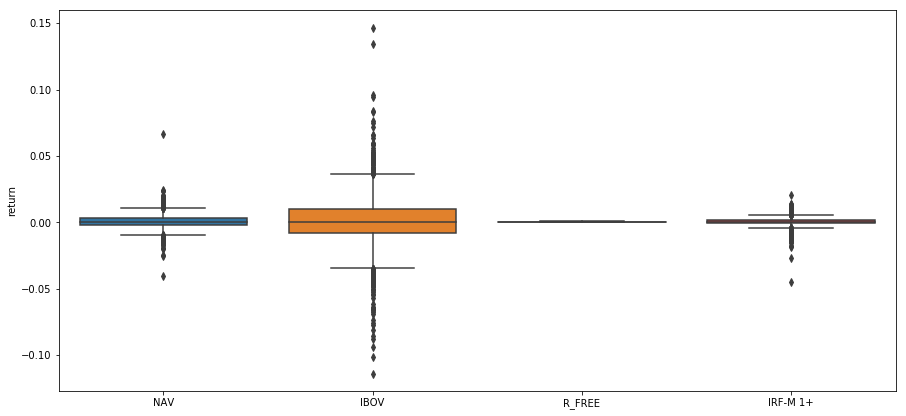

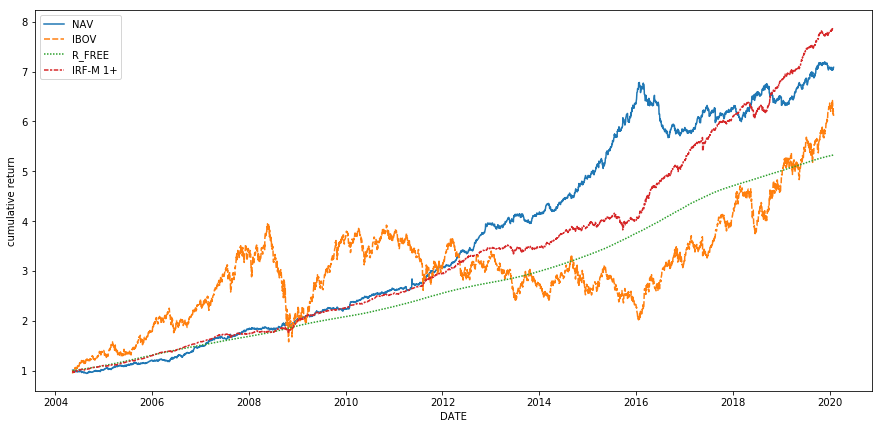

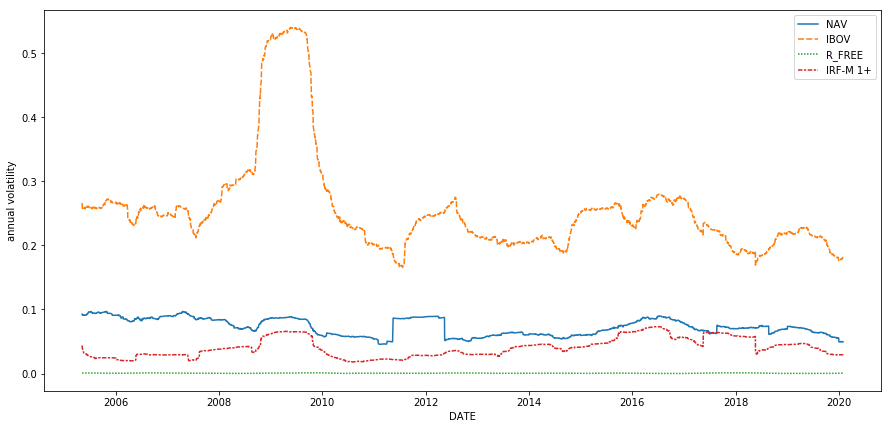

In [12]:
sublist = ['NAV','IBOV','R_FREE','IRF-M 1+']

plt.figure(figsize = (15,7))
ax = sns.boxplot(data=dfRetALL[sublist])
_ = ax.set(ylabel='return')

plt.figure(figsize = (15,7))
ax = sns.lineplot(data = dfALL[sublist])
_ = ax.set(ylabel='cumulative return')

plt.figure(figsize = (15,7))
ax = sns.lineplot(data = dfVolALL[sublist])
_ = ax.set(ylabel='annual volatility')

Start date,2004-05-10
End date,2020-01-31
Total months,188
,Backtest
Annual return,13.3%
Cumulative returns,608.5%
Annual volatility,7.4%
Sharpe ratio,1.72
Calmar ratio,0.82
Stability,0.97
Max drawdown,-16.3%


C:\Users\leand\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.29,2016-01-26,2016-08-31,2019-06-25,891
1,6.90,2004-05-20,2004-08-24,2004-12-09,146
2,4.69,2011-05-16,2011-06-08,2011-08-19,70
3,4.68,2013-08-06,2013-10-22,2013-12-11,92
4,4.40,2008-10-08,2008-10-28,2008-12-10,46


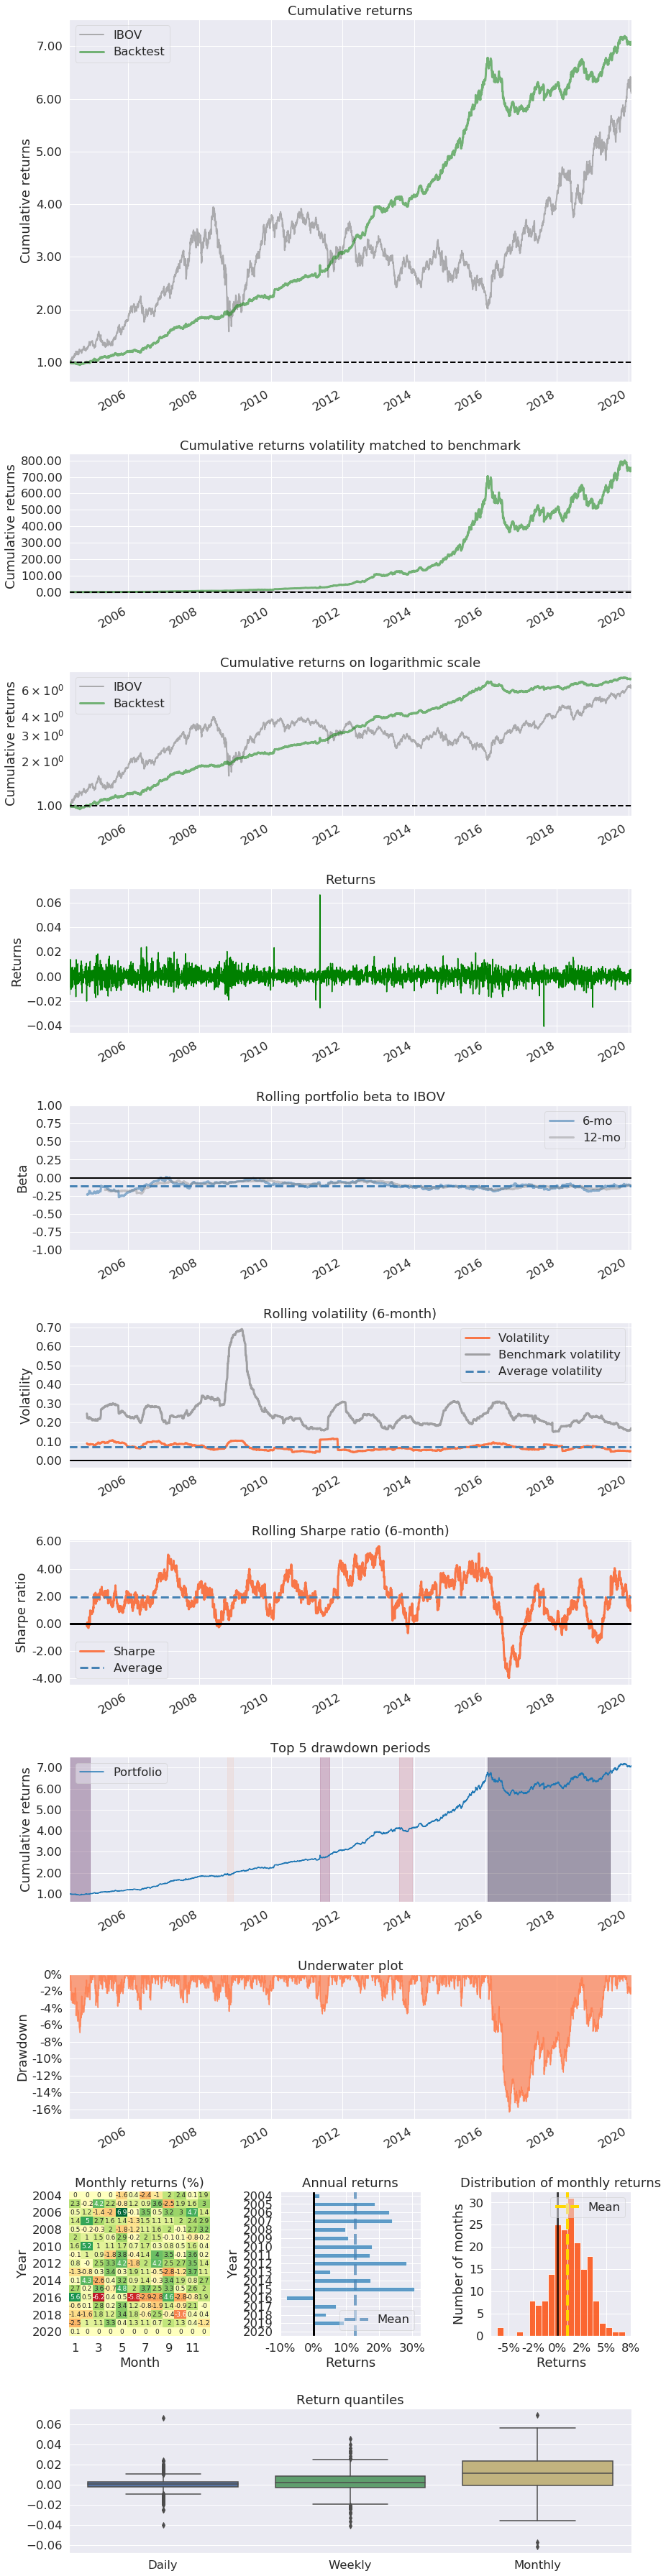

In [13]:
# Create a tear sheet on returns
pf.create_returns_tear_sheet(dfRetALL.NAV.tz_localize('UTC'), 
                             benchmark_rets = dfRetALL.IBOV.tz_localize('UTC'))

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,16.29,2016-01-26,2016-08-31,2019-06-25,891
1,6.90,2004-05-20,2004-08-24,2004-12-09,146
2,4.69,2011-05-16,2011-06-08,2011-08-19,70
3,4.68,2013-08-06,2013-10-22,2013-12-11,92
4,4.40,2008-10-08,2008-10-28,2008-12-10,46


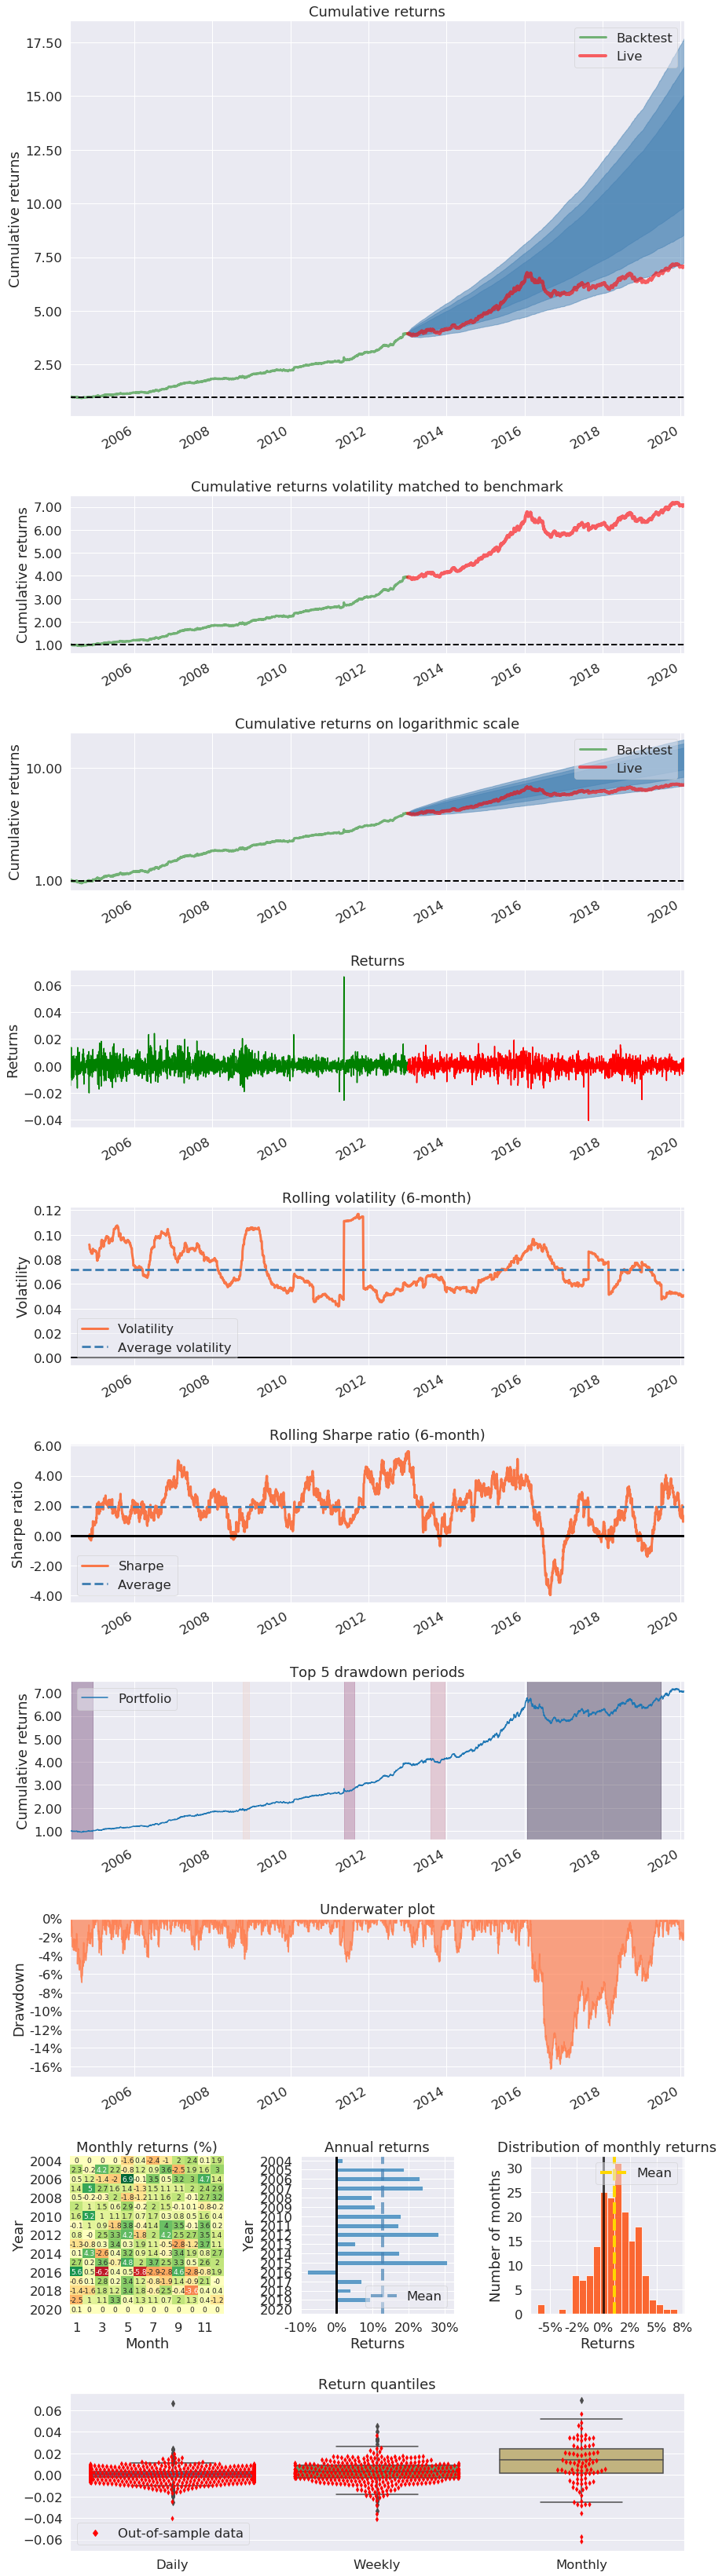

In [14]:
# If you have backtest and live data
pf.create_returns_tear_sheet(dfRetALL.NAV.tz_localize('UTC'), 
                             live_start_date='2012-12-31')